In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st
from scipy.constants import golden 
import statsmodels.api as sm

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize = (5.0, 5.0/golden)) 

astici = pd.read_csv('astici.csv', sep = ',', decimal=".", parse_dates=True)
astici

,kg.di.pesce,settore.di.pesca,forza.del.mare,peso.astice
0,0.020205,B,9,29.9
1,0.300007,G,9,29.3
2,1.779424,B,9,29.9
3,0.935345,E,7,29.9
4,0.450751,B,8,28.4
...,...,...,...,...
276,0.403444,B,1,8.6
277,2.703744,A,0,5.9
278,4.308614,B,0,3.8
279,4.353504,B,0,2.6


In [2]:
#1.1 Quanti astici sono stati trovati ?
len(astici)

281

In [3]:
#1.2 Quanti sono i settori di pesca ?
len(astici['settore.di.pesca'].unique())

9

In [4]:
#1.3 Quanti astici sono stati trovati nel settore A ?
len(astici[astici['settore.di.pesca'] == 'A'])

37

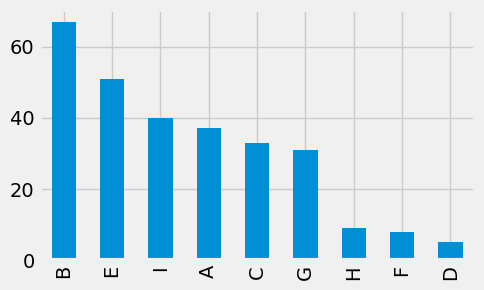

In [6]:
#1.4 Tracciare un grafico opportuno per visualizzare le frequenze dei settori di pesca
astici['settore.di.pesca'].value_counts().plot.bar()
plt.show()

In [13]:
#1.5 Settore di pesca col maggior numero di astici trovati
print('Settore B')

Settore B


In [14]:
#1.6 Percentuale di astici trovati in tale settore
(len(astici[astici['settore.di.pesca'] == 'B'])/len(astici))*100

23.843416370106763

In [24]:
#1.7 forza.del.mare è categorico, quantitativo discreto o quantitativo continuo ?
print('categorico')

categorico


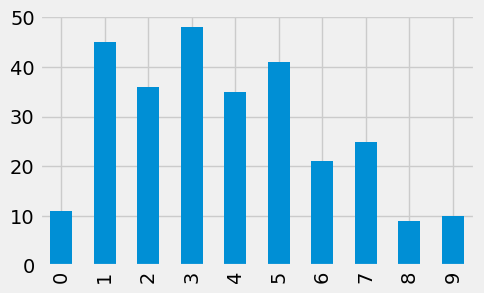

In [21]:
#1.8 Grafico opportuno per forza del mare
astici['forza.del.mare'].value_counts().sort_index().plot.bar()
plt.show()

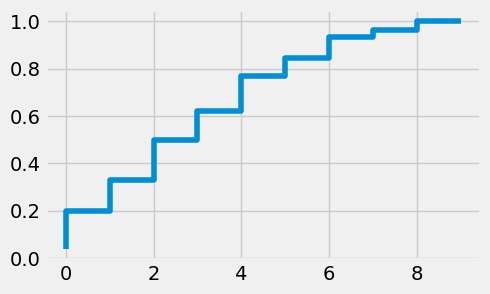

In [27]:
#1.9 Tracciate il grafico della funzione cumulativa empirica di forza del mare
ecdf = sm.distributions.ECDF(astici['forza.del.mare'])
x = np.arange(astici['forza.del.mare'].min(), astici['forza.del.mare'].max()+1)
y = ecdf(x)
plt.step(x,y)
plt.show()

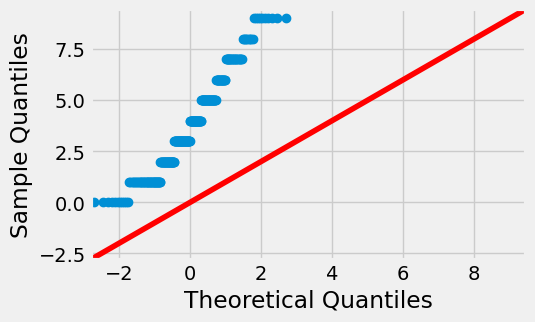

Il grafico conferma la distribuzione non approssimativamente normale di forza.del.mare


In [30]:
#1.10 forza.del.mare è distribuita in modo normale ? Giustificare con un grafico
sm.qqplot(astici['forza.del.mare'], line="45")
plt.show()
print('Il grafico conferma la distribuzione non approssimativamente normale di forza.del.mare')

In [31]:
#1.11 Forza del mare media
astici['forza.del.mare'].mean()

3.804270462633452

In [32]:
#1.12 Forza del mare riscontrata più frequentemente
astici['forza.del.mare'].mode()

0    3
Name: forza.del.mare, dtype: int64

In [33]:
#Concentriamoci ora sul peso degli astici trovati

In [36]:
#1.13 peso.astice è categorico, quantitativo discreto o continuo ?
astici['peso.astice'].head()
#print('Quantitativo continuo')

0    29.9
1    29.3
2    29.9
3    29.9
4    28.4
Name: peso.astice, dtype: float64

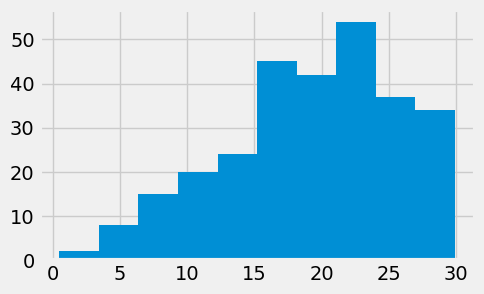

In [37]:
#1.14 Grafico opportuno per descrivere peso.astice
astici['peso.astice'].hist()
plt.show()

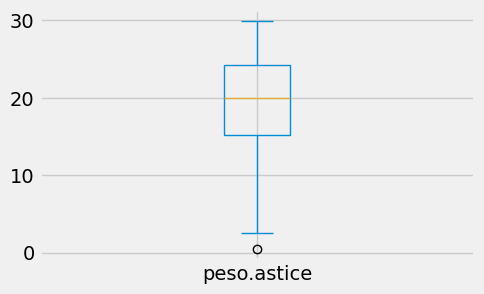

In [38]:
'''
1.15 Il dataset presenta un outlier per il carattere peso.astice: evidenziare tale valore utilizzando 
un’opportuna rappresentazione grafica.
'''
astici['peso.astice'].plot.box()
plt.show()

In [41]:
#1.16 Memorizzate in astici.filtrato il dataset ottenuto eliminando l'astice outlier
astici_filtrato = astici[astici['peso.astice'] != 0.5]
astici_filtrato

,kg.di.pesce,settore.di.pesca,forza.del.mare,peso.astice
0,0.020205,B,9,29.9
1,0.300007,G,9,29.3
2,1.779424,B,9,29.9
3,0.935345,E,7,29.9
4,0.450751,B,8,28.4
...,...,...,...,...
275,45.389504,C,0,7.1
276,0.403444,B,1,8.6
277,2.703744,A,0,5.9
278,4.308614,B,0,3.8


In [42]:
#1.17 Stimare il valore atteso e la varianza del peso degli astici pescati, escludendo l’outlier.
print('Valore atteso:', astici_filtrato['peso.astice'].mean(),'\nVarianza:', astici_filtrato['peso.astice'].var())

Valore atteso: 19.354285714285737 
Varianza: 40.49094930875574


In [45]:
'''
1.18 Sempre escludendo l’outlier e sfruttando opportunamente i risultati ottenuti al punto precedente, fornire
una maggiorazione della probabilità che il peso di un astice disti dal suo valore atteso, per eccesso o per
difetto, almeno 10 hg.
'''
import math
x = st.norm()
par = (10*math.sqrt(len(astici)/astici['peso.astice'].std()))
2*x.cdf(par) -1a

1.0

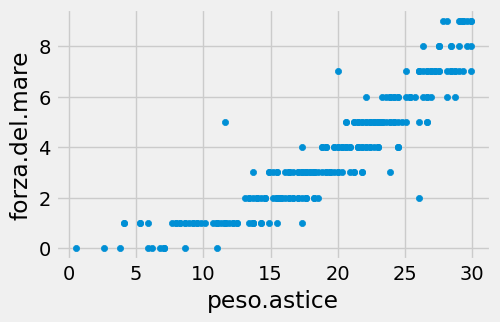

Il grafico seguente mostra come esiste una relazione positiva tra peso.astice e forza del mare



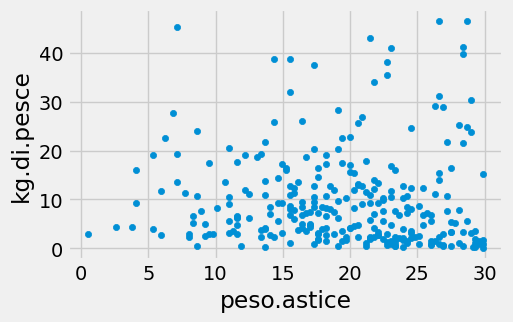

Il grafico seguente mostra come non esiste una relazione tra peso.astice e kg.di.pesce
-0.026641767369609604


In [54]:
'''
1.19 Si ritorni ad utilizzare il dataset completo e si controlli graficamente se sussiste una relazione tra:
    19.1. peso.astice e forza.del.mare;
    19.2. peso.astice e kg.di.pesce.
'''

astici.plot.scatter('peso.astice', 'forza.del.mare')
plt.show()
print('Il grafico seguente mostra come esiste una relazione positiva tra peso.astice e forza del mare')
print()

astici.plot.scatter('peso.astice', 'kg.di.pesce')
plt.show()
print('Il grafico seguente mostra come non esiste una relazione tra peso.astice e kg.di.pesce')

In [56]:
'''
1.20 Nel caso in cui si ritiene che ci sia una dipendenza, precisare di che tipo di dipendenza si tratta e calcolare
un indice numerico che stabilisca l’intensità di tale relazione.
'''
astici['peso.astice'].corr(astici['forza.del.mare'])
print('L indice di correlazione tra peso.astice e forza.del.mare conferma quanto suggerito dal grafico, \nconfermando una relazione positiva.')

L indice di correlazione tra peso.astice e forza.del.mare conferma quanto suggerito dal grafico, 
confermando una relazione positiva.


In [61]:
'''
1.21 I pescatori vorrebbero qualche garanzia riguardo alla stima del valore atteso del peso.astice. In particolare,
noto il numero di astici pescati (è stato richiesto al punto 1. di questo esercizio), vorrebbero che la
probabilità di errore nella stima fosse almeno uguale a 0.9. Qual è allora l’errore (espresso in hg) che
devono essere disposti a tollerare?
'''
y = st.norm()
a = astici['peso.astice'].std()/math.sqrt(len(astici))
a*(y.cdf(0.55))**2

0.19335252883561418